<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/PytorchTutorial2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[莫凡Pytorch教程（二）：Pytorch回归模型搭建](https://juejin.cn/post/7089612360226177037)



In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

# x data (tensor), shape=(100, 1)
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)   
#x = torch.linspace(-1, 1, 100)

# noisy y data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                  

print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: torch.Size([100, 1])
y.shape: torch.Size([100, 1])


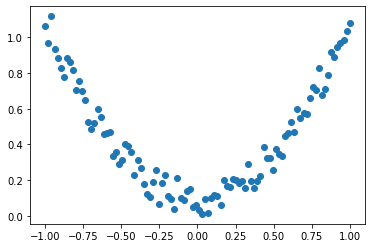

In [2]:
# Scatter with matplotlib
plt.scatter(x, y)
plt.show()

# Scatter with Plotly
#fig = go.Figure(layout=go.Layout(width=500, height=500))
#fig.add_trace(go.Scatter(y=y[:,0], x=x[:,0], mode='markers'))
fig = px.scatter(y=y[:,0], x=x[:,0], width=500, height=400)
fig.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        """ 
        Parameters
        ----------
        n_feature 
            represents the number of features,
        n_hidden 
            represents the number of neurons in the hidden layer,
        n_output 
            represents the number of output values
        """
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        """
        Parameters
        ----------
        x
            the input data
        """
        x = F.relu(self.hidden(x))
        y = self.predict(x)
        return y

In [4]:
# Visualizing Functions

def show_regress_mpl(x, y, prediction):
    """Plot and show learning process with Maplotlib.
    """
    plt.cla()
    plt.scatter(x, y)
    plt.plot(x, prediction, 'r-', lw=5)
    plt.text(0.5, 0, f'Loss={loss:.4f}')
    #plt.savefig("./img/02_"+str(step)+".png")
    plt.pause(0.01)


def show_regress_plotly(x, y, prediction):
    """Plot and show learning process with Plotly.
    """
    fig = go.Figure([
        go.Scatter(x=x, y=y, mode='markers', name='train'),
        go.Scatter(x=x, y=prediction, mode='lines', name='prediction', 
                   line=dict(color='red', width=5))
    ])
    fig.update_layout(annotations=[
        go.layout.Annotation(
            text=f"Loss={loss:.4f}", x=0.5, y=0, showarrow=False)
        ],
        width=600, height=400,
        margin=dict(l=20, r=20, t=20, b=20),
    )
    fig.show()

Net(
  (hidden): Linear(in_features=1, out_features=11, bias=True)
  (predict): Linear(in_features=11, out_features=1, bias=True)
)


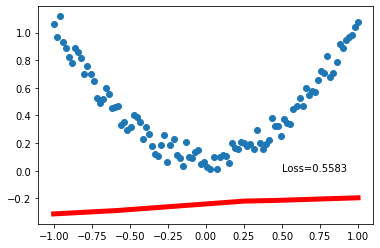

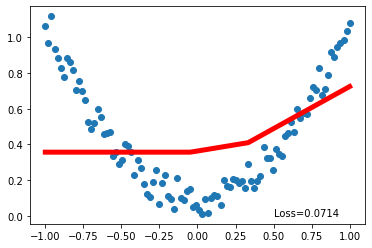

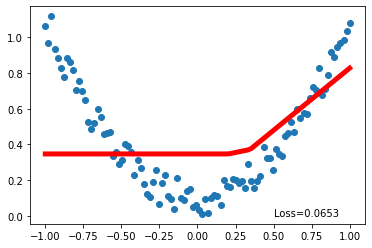

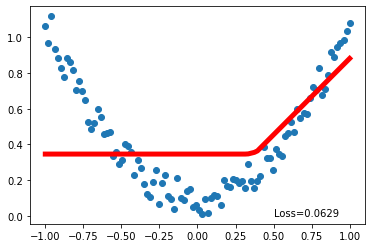

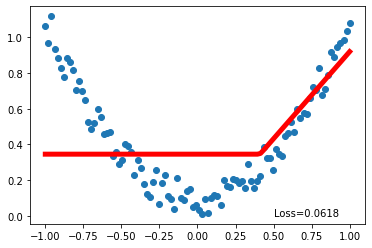

In [5]:
net = Net(1, 11, 1)
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)  
loss_func = torch.nn.MSELoss()    # For regression problem, use MSE

#plt.ion()
for step in range(100):
    # Forward (full batch at once)
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    # First, reduce all parameter gradients to zero (because this value will be 
    # kept after each calculation of gradient and not clearing it will lead to 
    # incorrect results)
    optimizer.zero_grad()   
                            
    # Perform reverse transmission to calculate gradients of all nodes in the 
    # computation graph                        
    loss.backward()         

    # After calculation, use optimizer to optimize these gradients
    optimizer.step() 

    if step % 20 == 0:
        show_regress_mpl(x, y, prediction.data)
        show_regress_plotly(x[:,0], y[:,0], prediction.data[:,0])

#plt.ioff()
plt.show()
